# Housing Prices Regression - Ames, Iowa Dataset

## 1. Goal
This assignment requires learners to:
- Practice solving regression problems
- Use scikit-learn to apply multiple models (Linear Regression, SVM, Decision Tree, Random Forest)
- Compare models using metrics and visualizations
- Understand the basics of feature selection and evaluation

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv("train.csv")

# Focus on two features for the first simple regression
df = data[["GrLivArea", "YearBuilt", "SalePrice"]].dropna()
df.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


# 2. Split the Data

In [2]:
from sklearn.model_selection import train_test_split

X = df[["GrLivArea", "YearBuilt"]]
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 3. Regressor Models

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "SVM": SVR(kernel="rbf"),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "MSE": mse, "R²": r2})

    print(f"=== {name} ===")
    print("MSE:", mse)
    print("R²:", r2)

=== Linear Regression ===
MSE: 2725908099.0636387
R²: 0.5871035359601551
=== SVM ===
MSE: 6941911042.0202465
R²: -0.05149932380842115
=== Decision Tree ===
MSE: 2851913077.71172
R²: 0.5680174155758764
=== Random Forest ===
MSE: 1775011928.1364148
R²: 0.7311368827849237


# 4. Evaluation Metrics

In [4]:
results_df = pd.DataFrame(results)
results_df

,Model,MSE,R²
0,Linear Regression,2.725908e+09,0.587104
1,SVM,6.941911e+09,-0.051499
2,Decision Tree,2.851913e+09,0.568017
3,Random Forest,1.775012e+09,0.731137


# 5. Visualizations

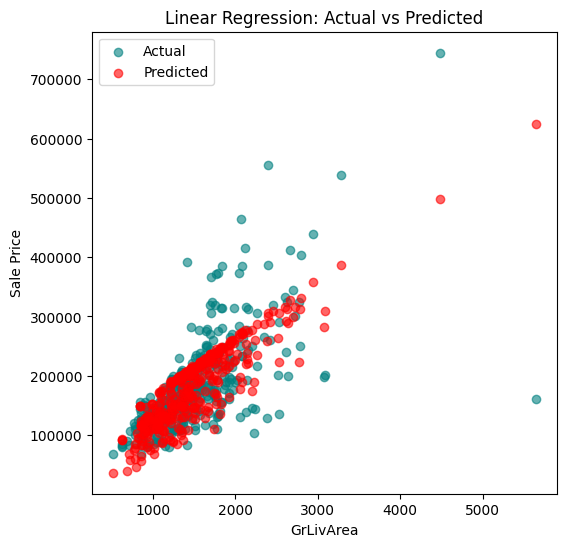

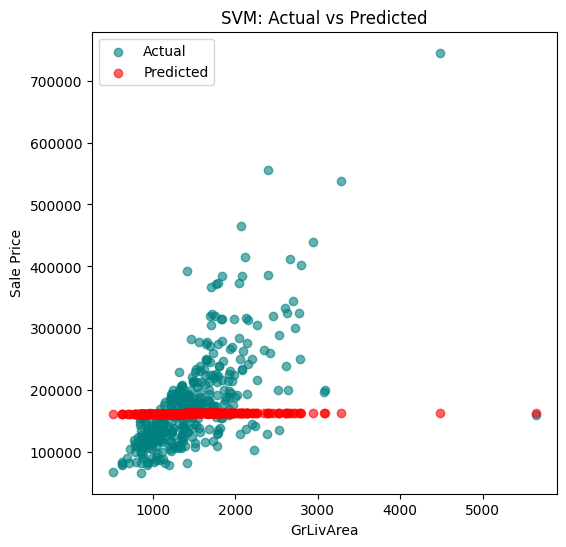

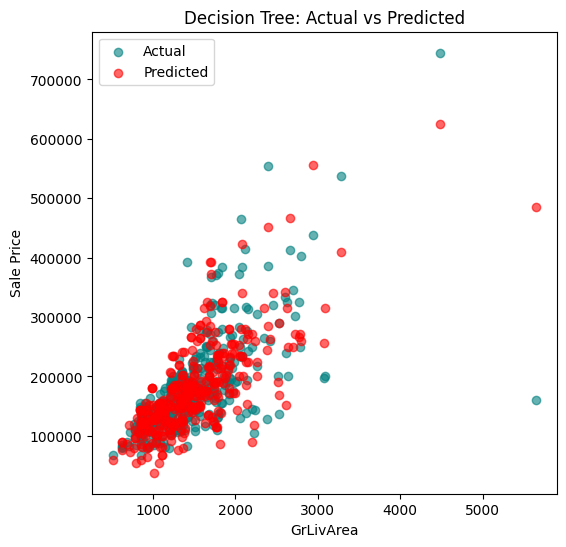

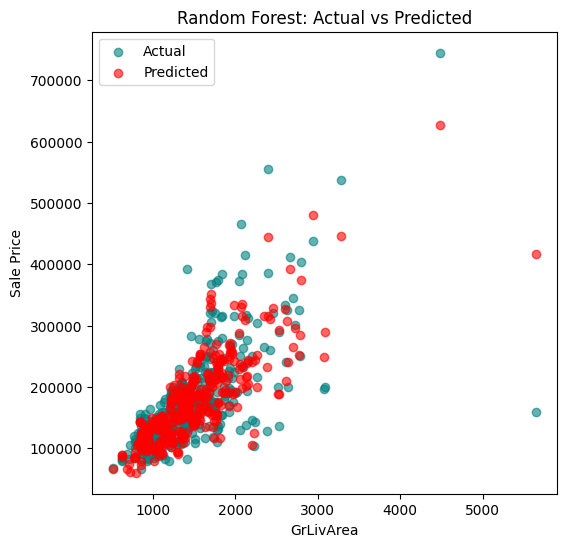

In [9]:
import matplotlib.pyplot as plt

# pick the feature to show on x-axis
feature_name = "GrLivArea"   # make sure this column exists in X_test

for name, model in models.items():
    y_pred = model.predict(X_test)

    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(X_test[feature_name], y_test, alpha=0.6, color="teal", label="Actual")
    ax.scatter(X_test[feature_name], y_pred, alpha=0.6, color="red",  label="Predicted")

    ax.set_xlabel(feature_name)
    ax.set_ylabel("Sale Price")
    ax.set_title(f"{name}: Actual vs Predicted")
    ax.legend()
    plt.show()

# 6. Try More Features

In [14]:
features = ["GrLivArea", "YearBuilt", "OverallQual", "TotalBsmtSF"]
X = data[features].dropna()
y = data.loc[X.index, "SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

rows = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "MSE": mse, "R²": r2})

    print(f"=== {name} ===")
    print("MSE:", mse)
    print("R²:", r2)

=== Linear Regression ===
MSE: 2210044172.922943
R²: 0.6652420436752065
=== SVM ===
MSE: 6950833276.372586
R²: -0.05285078500283258
=== Decision Tree ===
MSE: 2199381545.8858447
R²: 0.6668571241698518
=== Random Forest ===
MSE: 1079530534.4190137
R²: 0.8364822568164472


Model performance improves with more features, with Random Forest as the best performing model.